<a href="https://colab.research.google.com/github/rushil-18/Product-Review-Sentiment-Analysis/blob/main/notebooks/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Media Sentiment Analysis
This project performs sentiment classification on Amazon product reviews using TF-IDF and Naive Bayes.


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('/content/amazon_reviews_10k.csv')
df.head()


,Score,Time,Summary,Text
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [19]:
def label_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Score'].apply(label_sentiment)
df[['Score', 'Sentiment']].head()

,Score,Sentiment
0,5,Positive
1,1,Negative
2,4,Positive
3,2,Negative
4,5,Positive


In [20]:
X = df['Text'].astype(str)
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
predictions = model.predict(X_test_tfidf)


In [22]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
print(classification_report(y_test, predictions))


Accuracy: 0.746
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       322
     Neutral       0.00      0.00      0.00       186
    Positive       0.75      1.00      0.85      1492

    accuracy                           0.75      2000
   macro avg       0.25      0.33      0.28      2000
weighted avg       0.56      0.75      0.64      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


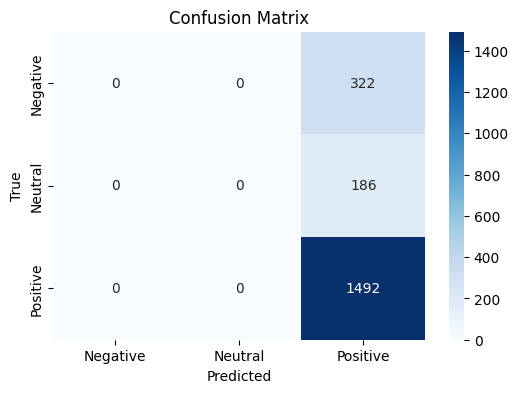

In [23]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# 📌 Enter any review and get sentiment prediction
def predict_sentiment(review_text):
    review_tfidf = tfidf.transform([review_text])
    prediction = model.predict(review_tfidf)[0]
    return prediction

# 👇 Enter your own review text here
user_review = input("Enter a review: ")
result = predict_sentiment(user_review)
print(f"Predicted Sentiment: {result}")

Enter a review: duc
Predicted Sentiment: Positive
